## DERIVING CRIME RATE GROWTH ##

Top 10 SA2s by Victim Rate in 2025
                          SA2_NAME21    VictimRate
3869                  Port Melbourne  10501.046883
3589                  East Melbourne  10501.046883
3639               Kensington (Vic.)  10501.046883
3659                       Parkville  10501.046883
3689              South Yarra - West  10501.046883
3719     West Melbourne - Industrial  10501.046883
3729            Melbourne CBD - East  10501.046883
3739           Melbourne CBD - North  10501.046883
3749            Melbourne CBD - West  10501.046883
3769  Royal Botanic Gardens Victoria  10501.046883


/var/folders/67/y3hlgrln6w72sw4d6d3mwhm80000gn/T/ipykernel_2366/3285209620.py:42: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  crime_long["Incidents_YoY"] = crime_long.groupby("SA2_CODE21")["Incidents"].pct_change() * 100
/var/folders/67/y3hlgrln6w72sw4d6d3mwhm80000gn/T/ipykernel_2366/3285209620.py:43: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  crime_long["VictimRate_YoY"] = crime_long.groupby("SA2_CODE21")["VictimRate"].pct_change() * 100


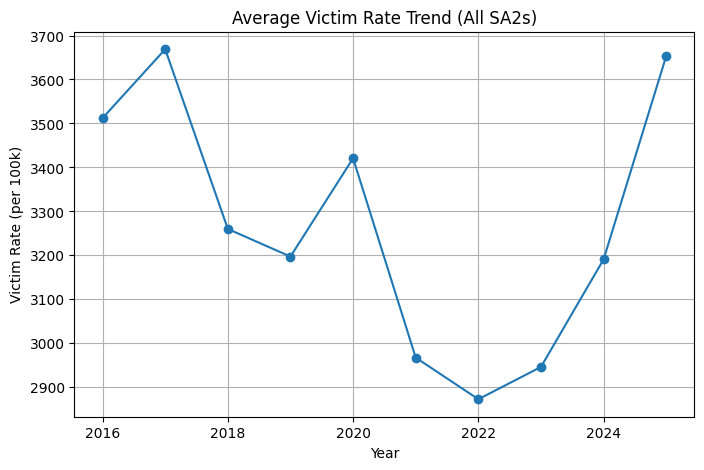

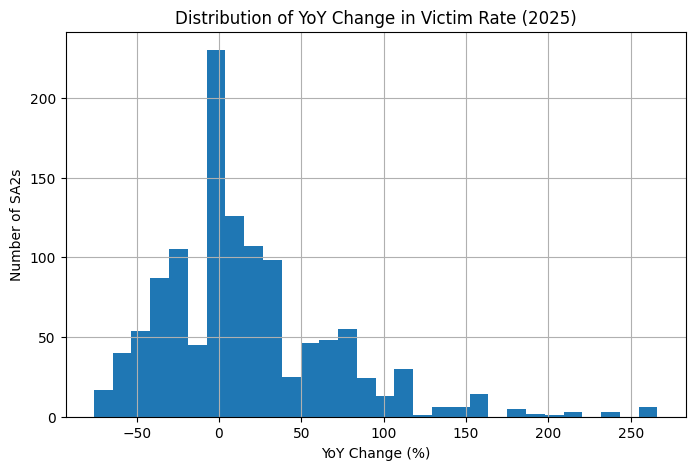

[ok] Saved reshaped dataset with YoY growth: /Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/data/cleaned_tasneem_ariq/3. crime/crime_dataset_long.csv


In [2]:
# Crime rate derivation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ================== LOAD DATA ==================
crime_path = Path("/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/data/cleaned_tasneem_ariq/3. crime/crime_dataset.csv")
crime_df = pd.read_csv(crime_path)

# ================== RESHAPE ==================
# Melt incidents
incidents_cols = [c for c in crime_df.columns if c.startswith("Incidents_")]
victim_cols    = [c for c in crime_df.columns if c.startswith("VictimRate_")]

incidents_long = crime_df.melt(
    id_vars=["SA2_CODE21", "SA2_NAME21", "LGA_CODE21", "LGA_NAME21", "lat", "lng"],
    value_vars=incidents_cols,
    var_name="Year", value_name="Incidents"
)
victims_long = crime_df.melt(
    id_vars=["SA2_CODE21", "SA2_NAME21", "LGA_CODE21", "LGA_NAME21", "lat", "lng"],
    value_vars=victim_cols,
    var_name="Year", value_name="VictimRate"
)

# Clean Year columns (strip prefix)
incidents_long["Year"] = incidents_long["Year"].str.replace("Incidents_", "").astype(int)
victims_long["Year"]   = victims_long["Year"].str.replace("VictimRate_", "").astype(int)

# Merge both
crime_long = pd.merge(
    incidents_long,
    victims_long,
    on=["SA2_CODE21", "SA2_NAME21", "LGA_CODE21", "LGA_NAME21", "lat", "lng", "Year"],
    how="outer"
)

# ================== GROWTH RATES ==================
# YoY growth % for Incidents and VictimRate
crime_long = crime_long.sort_values(["SA2_CODE21", "Year"])
crime_long["Incidents_YoY"] = crime_long.groupby("SA2_CODE21")["Incidents"].pct_change() * 100
crime_long["VictimRate_YoY"] = crime_long.groupby("SA2_CODE21")["VictimRate"].pct_change() * 100

# ================== SUMMARY ANALYSIS ==================
# Top 10 SA2s by latest VictimRate
latest_year = crime_long["Year"].max()
top10 = (crime_long[crime_long["Year"] == latest_year]
         .sort_values("VictimRate", ascending=False)
         .head(10))

print("Top 10 SA2s by Victim Rate in", latest_year)
print(top10[["SA2_NAME21", "VictimRate"]])

# ================== PLOTS ==================
# Example: Average VictimRate trend over time (statewide)
avg_victim_trend = crime_long.groupby("Year")["VictimRate"].mean()
plt.figure(figsize=(8,5))
avg_victim_trend.plot(marker="o")
plt.title("Average Victim Rate Trend (All SA2s)")
plt.ylabel("Victim Rate (per 100k)")
plt.grid(True)
plt.show()

# Example: YoY distribution (latest year)
plt.figure(figsize=(8,5))
crime_long[crime_long["Year"] == latest_year]["VictimRate_YoY"].hist(bins=30)
plt.title(f"Distribution of YoY Change in Victim Rate ({latest_year})")
plt.xlabel("YoY Change (%)")
plt.ylabel("Number of SA2s")
plt.show()

# ================== OPTIONAL: SAVE CLEAN LONG DATA ==================
out_path = crime_path.parent / "crime_dataset_long.csv"
crime_long.to_csv(out_path, index=False)
print(f"[ok] Saved reshaped dataset with YoY growth: {out_path}")
